In [138]:
import numpy as np
import pandas as pd
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [134]:
df = pd.read_csv('/content/sample_data/spam.csv', encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [135]:
# dropping last three columns cause they contain most NaN values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [136]:
#renaming columns
df.rename(columns = {'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
5111,ham,I've reached sch already...
2280,ham,R Ì_ comin back for dinner?
2293,ham,Hello. Damn this christmas thing. I think i ha...
4857,ham,Ok...
1146,ham,Babe ? I lost you ... :-(


In [68]:
encoder = LabelEncoder()

In [69]:
df['target'] = encoder.fit_transform(df['target'])

In [70]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [71]:
#checking for duplicate values and removing them
df.duplicated().sum()
df = df.drop_duplicates(keep='first')

In [72]:
df


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


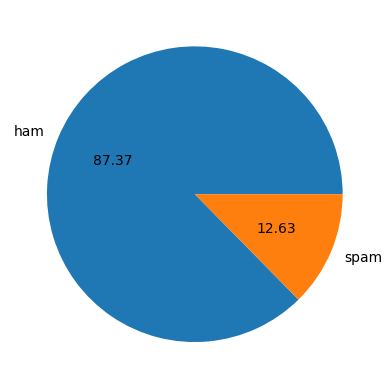

In [73]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [74]:
df['num_characters']= df['text'].apply(len)

In [75]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [76]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [77]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [78]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

<Axes: xlabel='num_characters', ylabel='Count'>

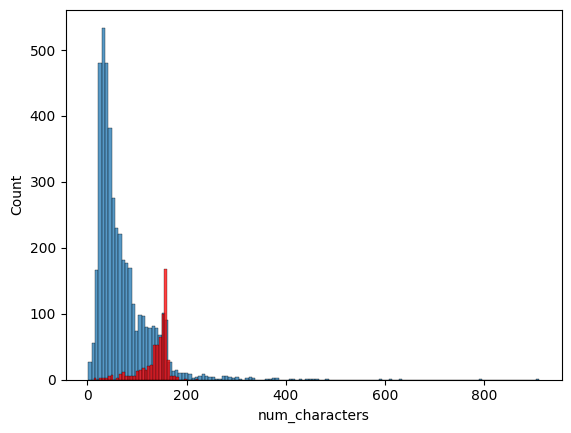

In [79]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

In [80]:
ps = PorterStemmer()
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [81]:
df['transformed_text']=df['text'].apply(transform)

In [ ]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

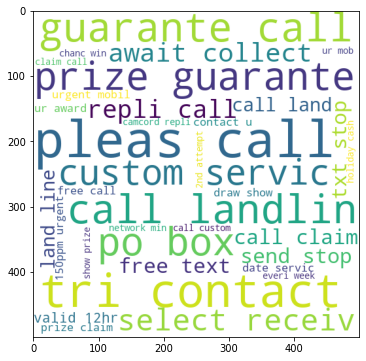

In [ ]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

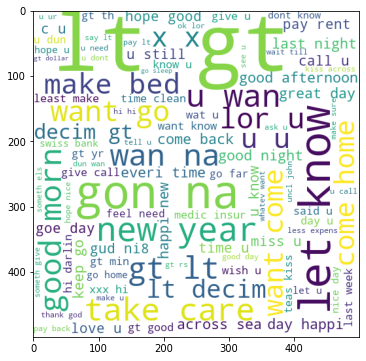

In [ ]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [119]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True, max_features=3000)

In [120]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [121]:
y = df['target'].values

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [128]:
gnb = GaussianNB()
log = LogisticRegression()

In [129]:
log.fit(X_train, y_train)
y_pred0 = log.predict(X_test) 
print(accuracy_score(y_test,y_pred0))
print(confusion_matrix(y_test,y_pred0))
print(precision_score(y_test,y_pred0))

0.9555125725338491
[[894   2]
 [ 44  94]]
0.9791666666666666


In [130]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8413926499032882
[[758 138]
 [ 26 112]]
0.448


In [137]:
text = ["You have an overdue tax refund of $1,000 waiting to be claimed! Click the link below to get started now"]
transformed_text = [transform(text[0])]
vectorizedText = tfidf.transform(transformed_text)
prediction = log.predict(vectorizedText)
if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

Spam mail
